In [11]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [12]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [13]:
data = pd.read_csv('./data/train.csv')

In [14]:
data.shape

(891, 12)

We have 891 rows and 12 columns.

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead. The is the variable we're going to predict.

The other variables describe the passengers. They are the features.

* PassengerId: an id given to each traveler on the boat
* Pclass: the ticket class. It has three possible values: 1, 2, 3 (first, second and third class)
* The Name of the passeger
* The Sex
* The Age
* SibSp: number of siblings / spouses aboard the Titanic
* Parch: number of parents / children aboard the Titanic
* The ticket number
* The ticket fare
* The cabin number
* The embarkation. This describes three possible areas of the Titanic from which the people embark. Three possible values: S, C, Q

Pandas allows you to a have a high-level simple statistical description of the numerical features. This can be done using the describe method.

In [17]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.
One solution is to fill in the null values with the median age. (We could also impute with the mean age but the median is more robust to outliers.)

In [18]:
data['Age'] = data['Age'].fillna(data['Age'].median())

Let's visualize survival based on the gender.

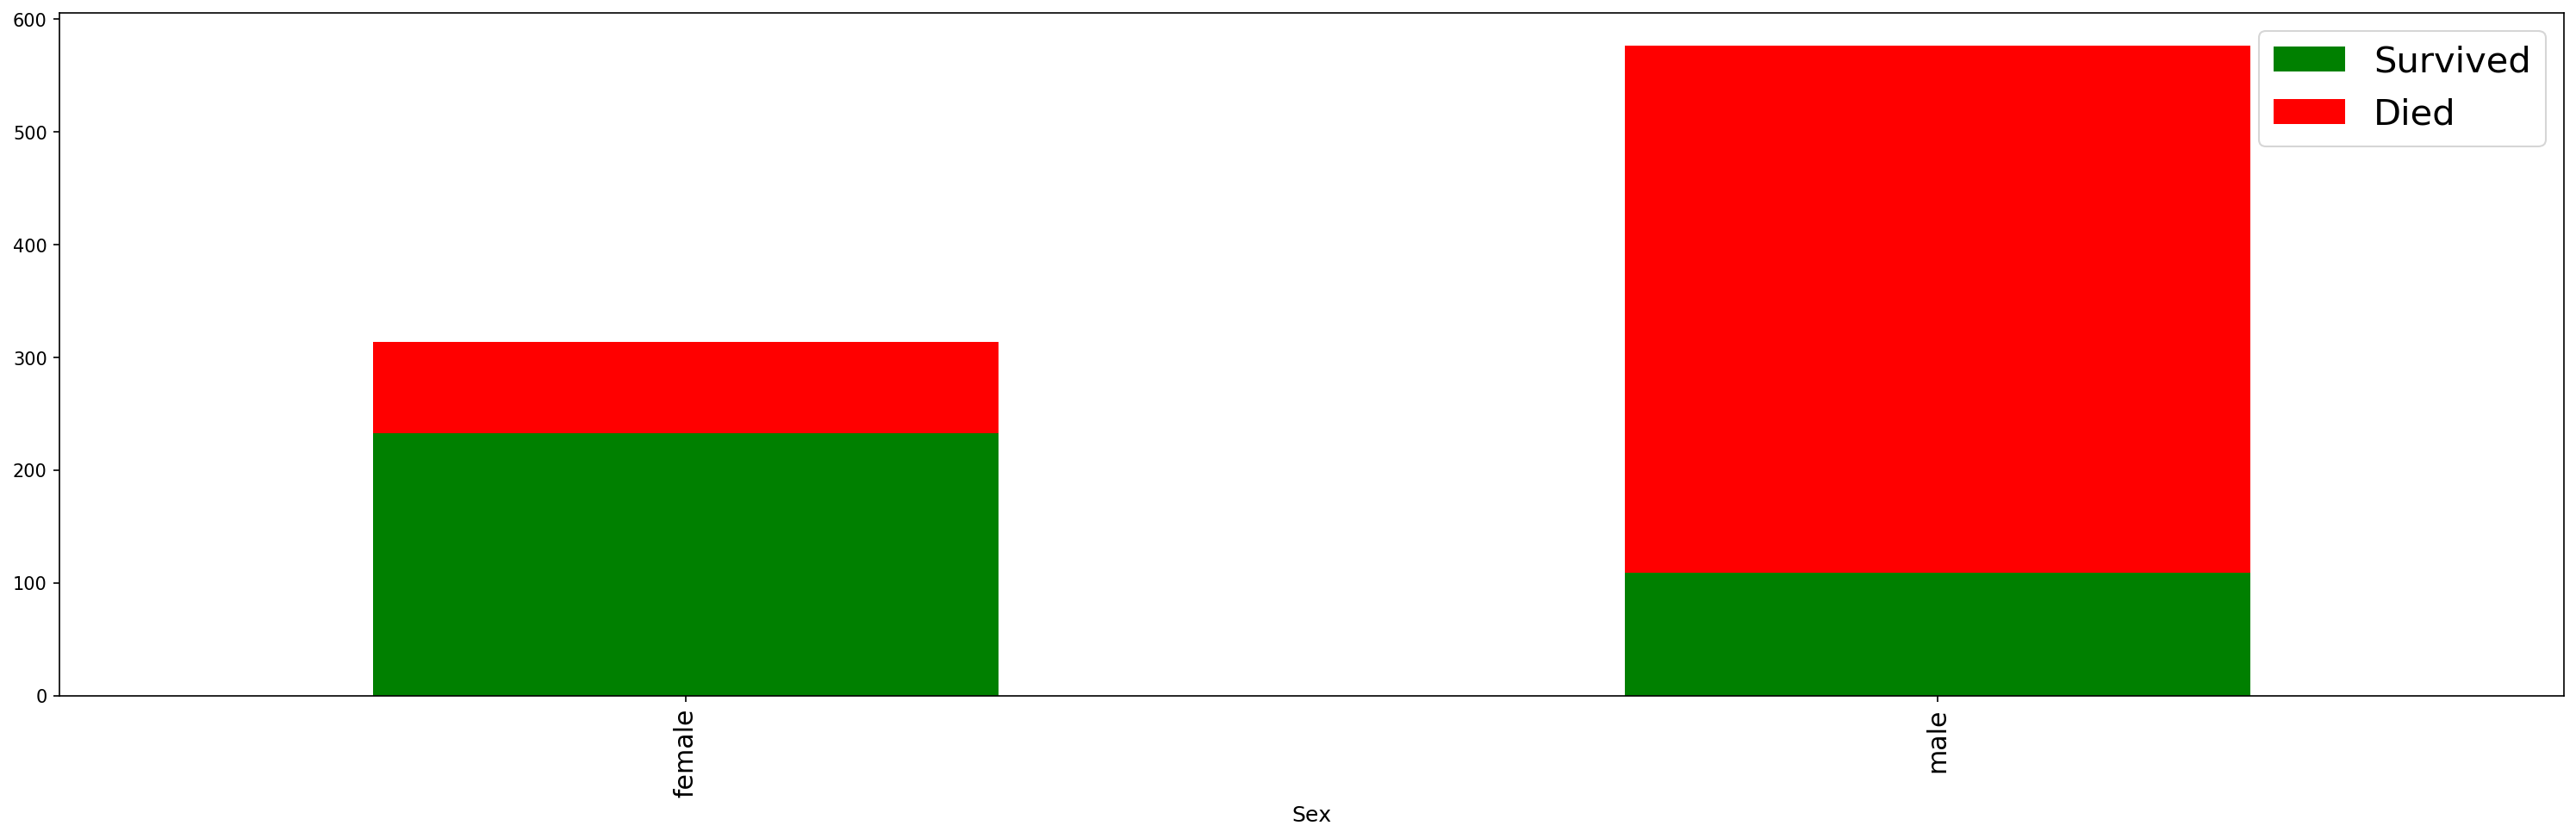

In [26]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

Same graph but with ratio:

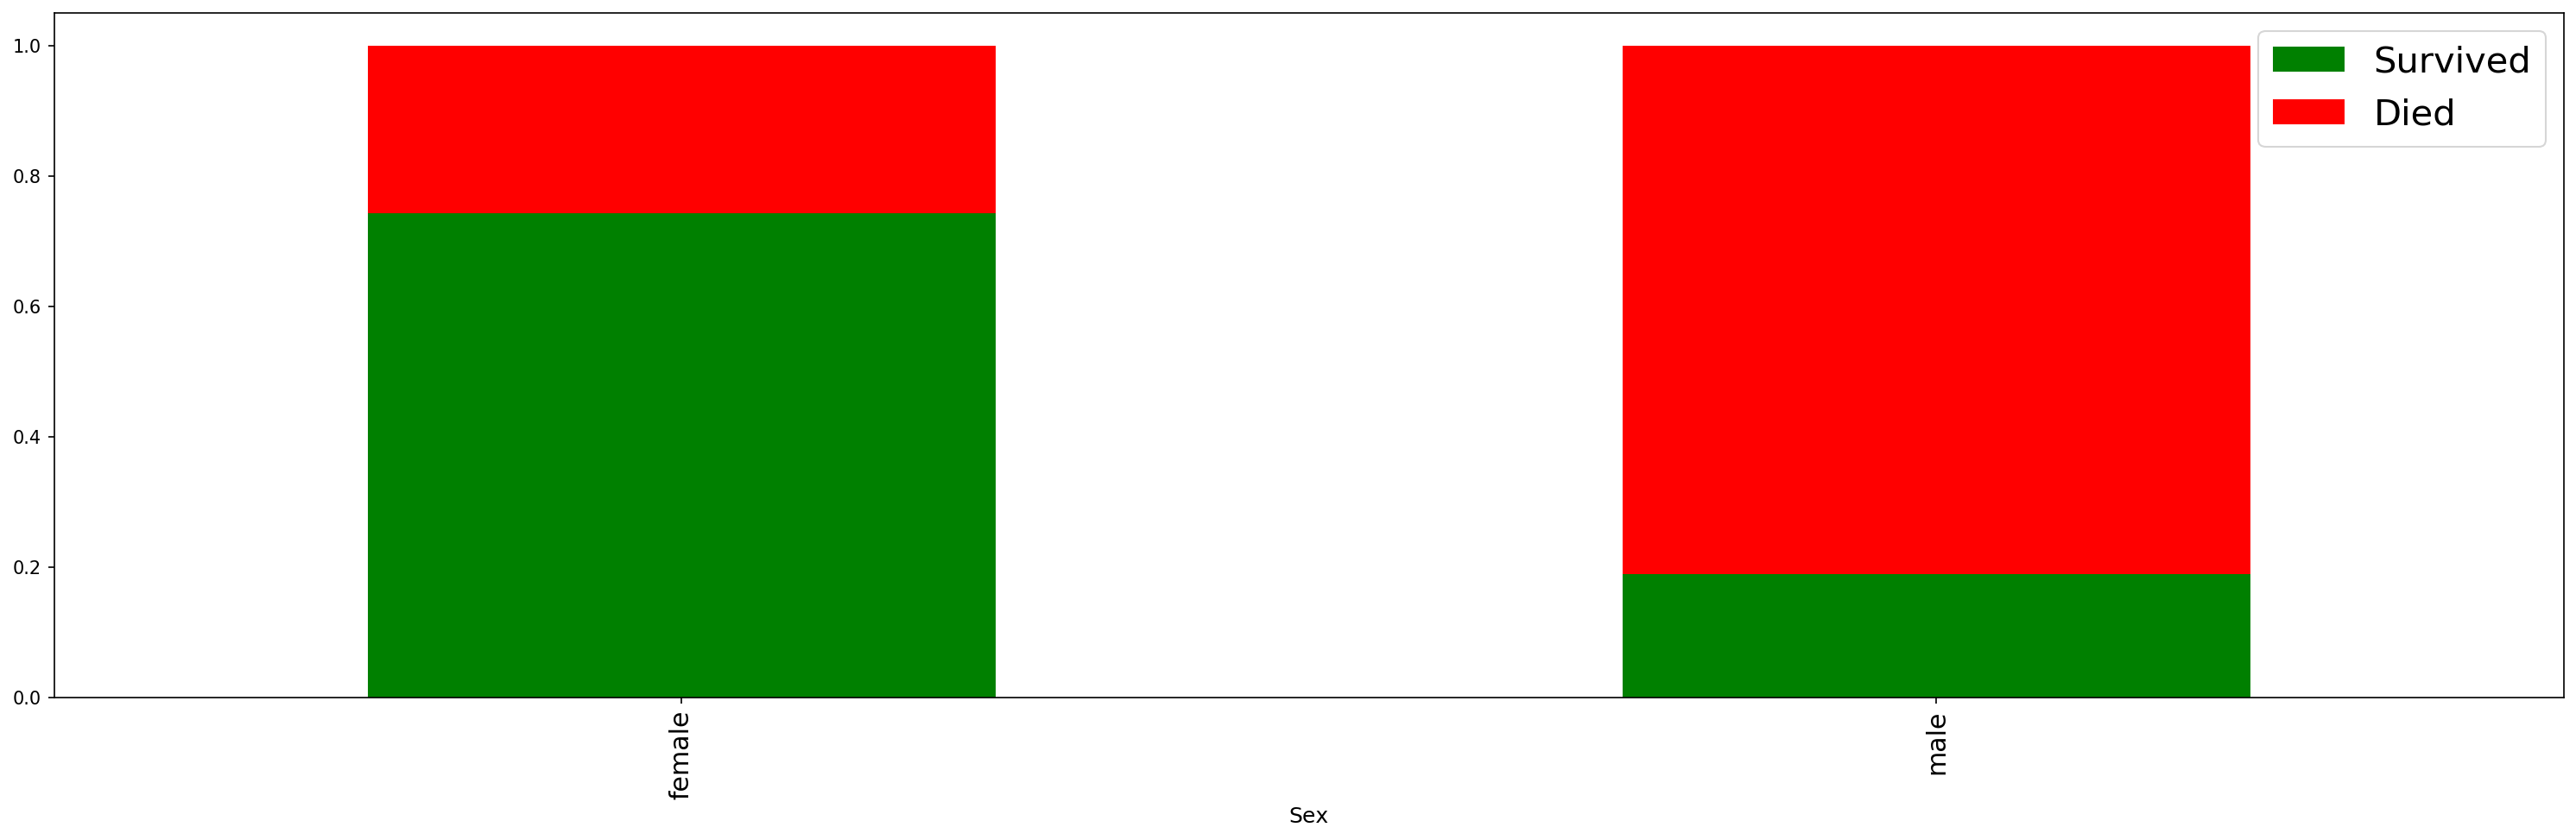

In [36]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['g', 'r']);

Women are more likely to survive. Let's correlate the survival with the age variable.

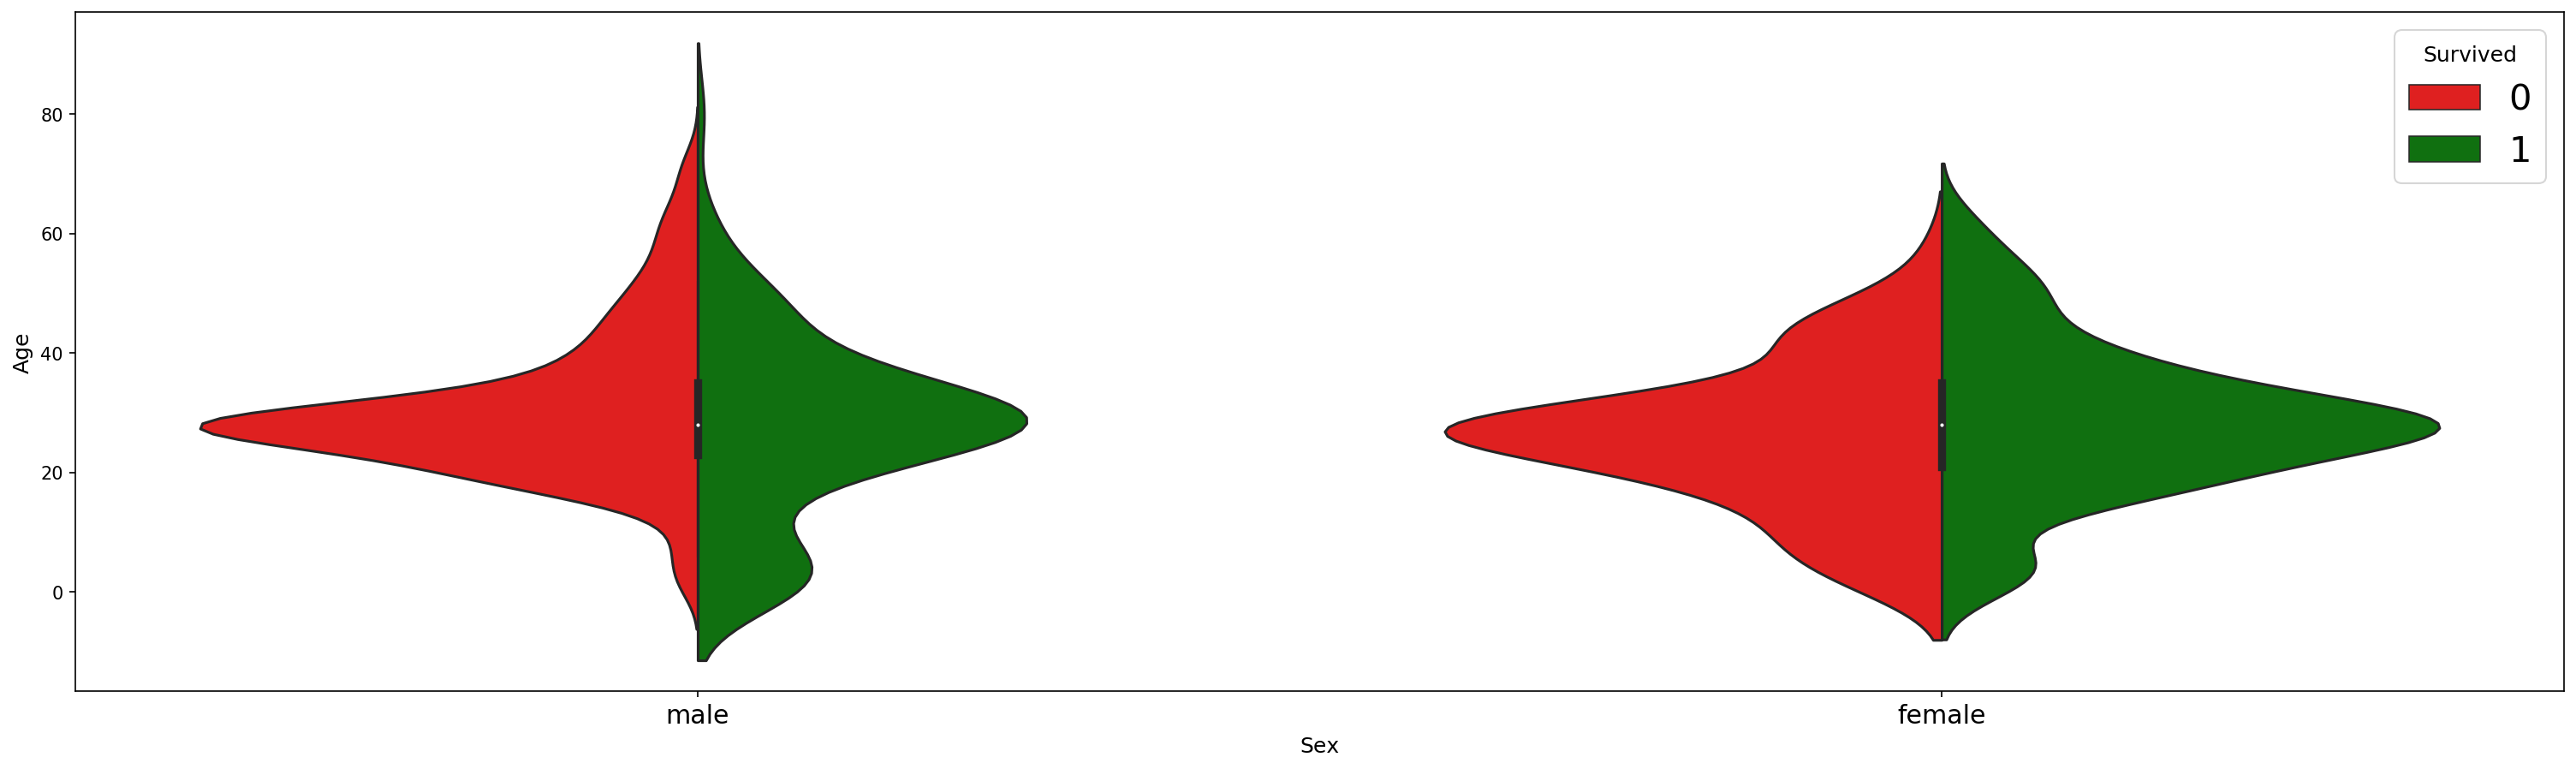

In [37]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

Conclusions from the chart:
* Women survive more than men (considering the larger female green histogram)
* Younger males tend to survive
* Large quantity of passengers between 20 and 40 die
* Age doesn't seem to have a direct impact on females surviving

Let's inspect the fare ticket of each passenger and see how it could impact the survival.

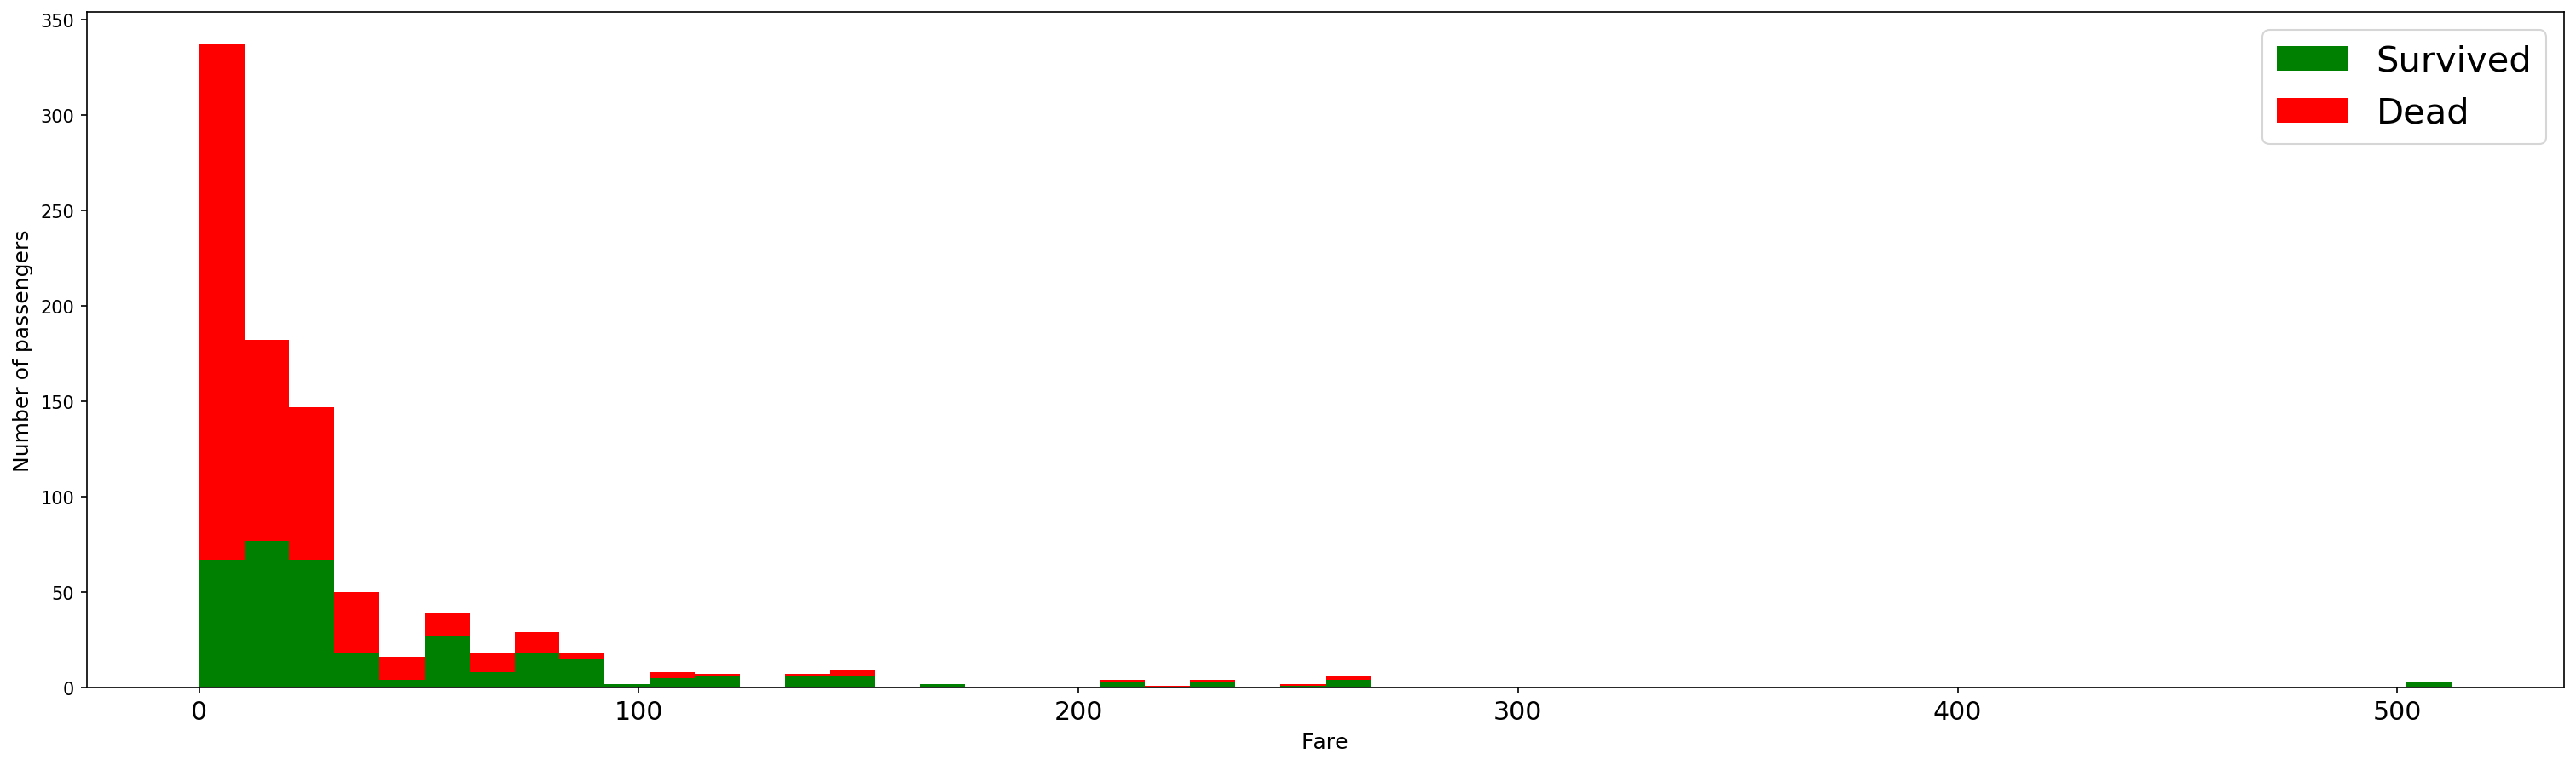

In [39]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Conclusions from the chart:
* Passangers with cheaper tickets are more likely to die; passengers with more expensive tickets seem to be rescued first.

Let's combine age, fare and survival in a single chart.

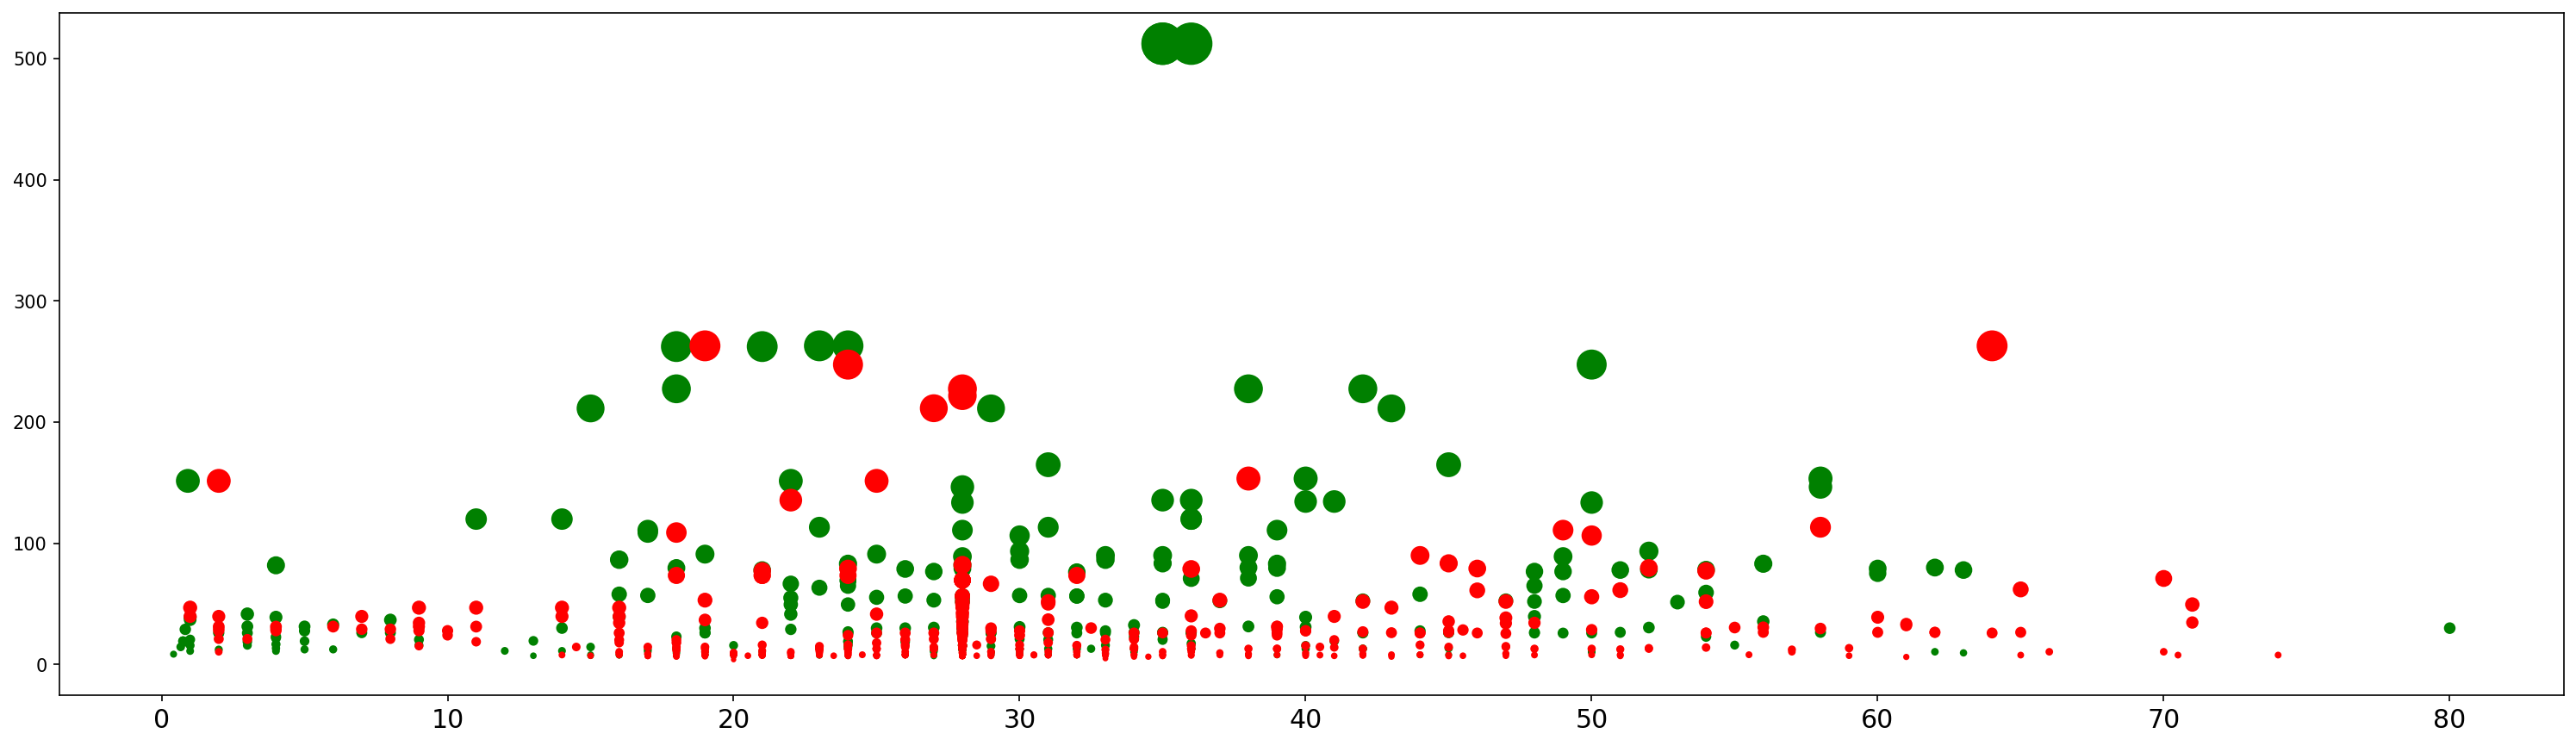

In [40]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);